In [13]:
import numpy as np


# PUNTO 1

In [14]:
codigo='019'
a=int((codigo)[0])
b=int((codigo)[1])
c=int((codigo)[2])
L1=(5+a/5)
L2=(6+b/4)
L3=(4+c/10)
H=L1+1
gama=150
alpha=np.arctan(L2/L1)
beta=np.arctan(H/L2)
LAB=H/np.sin(beta)
print(f"L1={L1}")
print(f"L2={L2}")
print(f"L3={L3}")
print(f"LAB={LAB}")
print(f"alpha={np.degrees(alpha)}")
print(f"beta={np.degrees(beta)}")

L1=5.0
L2=6.25
L3=4.9
LAB=8.663861725581729
alpha=51.34019174590991
beta=43.830860672092584


In [15]:
P1=gama*H**2*6/2
P2=gama*H**2*6/2/np.sin(beta)

In [16]:
CB=P2*LAB/3/1.5/L2
CB

7206.0

In [17]:
FD=(-P1*H/3+CB*1.5*L2)/np.cos(alpha)/L2
FD

9004.393458889943

# PUNTO 2

In [18]:
L1=(3+b/5)
L2=(4+c/4)
a75=np.radians(75)
a60=np.radians(60)
D=2*L2/np.tan(a75)
alpha=np.arctan(L2/(L1+D/2))
print(f"L1={L1}")
print(f"L2={L2}")
print(f"alpha={np.degrees(alpha)}")

L1=3.2
L2=6.25
alpha=52.0475790794754


In [19]:
P1=400*2*L1
P2=400*L1
RE=(P1*(D+L1)+P2*(D+4*L1/3))/((D+2*L1)*np.cos(a60)+2*L2*np.sin(a60))
print(f"RE={RE}")

RE=1688.8467878998233


In [20]:
BD=(RE*np.cos(a60)*2*L1-P1*L1-P2*4*L1/3)/(L1*np.sin(alpha))
print(f"BD={BD}")

BD=-3269.1805015870295


In [21]:
Cy=P1+P2-RE*np.cos(a60)+BD*np.sin(alpha)
print(f"Cy={Cy}")

Cy=417.75672728324525


# Diagramas 

In [22]:
import matplotlib.pyplot as plt
x=np.arange(0,2*L1,0.01)


## Cortante

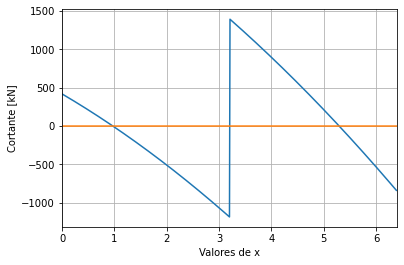

In [37]:
V=np.zeros([np.size(x),1])
for i in range(0,np.size(x)):
    if x[i]<=L1:V[i]=-400*x[i]-100*x[i]**2/L1+Cy
    else:V[i]=-400*x[i]-100*x[i]**2/L1+Cy-BD*np.sin(alpha)
        
plt.grid()
plt.xlim(0,2*L1)  
plt.xlabel('Valores de x')  
plt.ylabel(u'Cortante [kN]')
plt.plot(x,V)
plt.plot(x)

## Momento


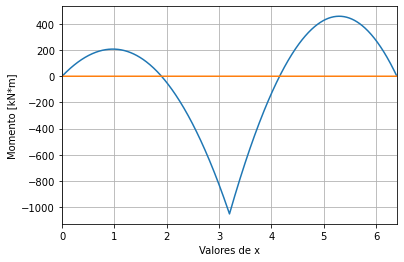

In [45]:
M=np.zeros([np.size(x),1])
for i in range(0,np.size(x)):
    if x[i]<=L1:M[i]=Cy*x[i]-400*x[i]**2/2-100*x[i]**3/(3*L1)
    else:M[i]=Cy*x[i]-400*x[i]**2/2-100*x[i]**3/(3*L1)-BD*np.sin(alpha)*(x[i]-L1)
plt.grid()
plt.xlim(0,2*L1)  
plt.xlabel('Valores de x')  
plt.ylabel('Momento [kN*m]')
plt.plot(x,M)
plt.plot(x)


## Punto 4

In [ ]:
if c==0:L1=b
else:L1=c
pi=np.pi
D=3*L1
r=D/2
A=np.zeros([4,1])
y=np.zeros([4,1])
x=np.zeros([4,1])
print(f"L1={L1}")

In [ ]:
## Áreas
A[1]=pi*r**2/2
A[2]=(3*L1)**2
A[3]=-(3*L1)*L1/2
## Centroides en X
x[1]=3*L1/2
x[2]=3*L1/2
x[3]=3*L1/2
## Centroides en y
y[1]=3*L1+4*r/(3*pi)
y[2]=3*L1/2
y[3]=L1
print(f"A1 {A[1]}")
print(f"A2 {A[2]}")
print(f"A3 {A[3]}")
print(f"El área total es {sum(A)}")

In [ ]:
## Centroide yt de la figura
Mx=A*y
yt=sum(Mx)/sum(A)
print(f"Mx={sum(Mx)}")
print(f"yt={yt}")

# Centroide con respecto al eje X

In [ ]:
#Figura 1
Icx1=1/8*pi*r**4-pi*r**2/2*(4*r/(3*pi))**2
Ix1=Icx1+pi*r**2/2*y[1][0]**2
# Figura 2
Ix2=3*L1*(3*L1)**3/3
# Figura 3
Ix3=L1*(3*L1)**3/12
#Inercia Total
IX=Ix1+Ix2-Ix3
print(f"Ix1= {Ix1}")
print(f"Ix2= {Ix2}")
print(f"Ix3= {Ix3}")
print(f"IX= {IX}")

# Centroide con respecto al eje Y

In [ ]:
#Figura 1
Icy1=1/8*pi*r**4
Iy1=Icy1+A[1][0]*x[1][0]**2
# Figura 2
Iy2=3*L1*(3*L1)**3/3
# Figura 3
Icy3=3*L1*(L1/2)**3/6
Iy3=Icy3+abs(A[3][0])*x[3][0]**2
#Inercia Total
IY=Iy1+Iy2-Iy3
print(f"Iy1= {Iy1}")
print(f"Iy2= {Iy2}")
print(f"Iy3= {Iy3}")
print(f"IY= {IY}")

# Centroide con respecto centroide paralelo al eje X

In [ ]:
#Figura 1
Ixt1=Icx1+A[1]*(yt-y[1])**2
# Figura 2
Ixt2=3*L1*(3*L1)**3/12+A[2]*(yt-y[2])**2
# Figura 3
Ixt3=1/36*L1*(3*L1)**3+abs(A[3])*(yt-y[3])**2
#Inercia Total
IXt=Ixt1+Ixt2-Ixt3
print(f"Ixt1= {Ixt1}")
print(f"Ixt2= {Ixt2}")
print(f"Ixt3= {Ixt3}")
print(f"IXt= {IXt}")